In [9]:
import json

text_scores_f = "JPL_TEXTONLY_SVM_fall-eval-predicts.json"
image_scores_f = "201607QPR_base.201611_data.iter_85000.dan_run.scores.avg.jl"
merged_scores_f = "JPL_Kitware_merged_text-image-eq-wts.jl"

def read_file(f_n):
    with open(f_n) as recs:
        return list(map(json.loads, recs))

def index(recs):
    res = {}
    for rec in recs:
        res[rec['cluster_id']] = rec['score']
    return res


img_recs = index(read_file(image_scores))
text_recs = read_file(text_scores)

with open(merged_scores_f, 'w') as out:
    ok, tot, miss = 0, 0, 0
    for tr in text_recs:
        tot += 1
        cid, score1 = tr['cluster_id'], tr['score']
        if cid in img_recs:
            score2 = img_recs[cid]
            tr['score']  = 0.5 *(score1 + score2 ) # average of two
            if (score1 < 0.5 and score2 < 0.5) or \
                (score1 > 0.5 and score2 > 0.5):
                    ok += 1
        else:
            miss += 1
        out.write(json.dumps(tr))
        out.write('\n')
    print("Tot:", tot, "   Missed:", miss, "  Agreed:", ok)

('Tot:', 247, '   Missed:', 15, '  Agreed:', 133)


In [10]:
!ls

201607QPR_base.201611_data.iter_85000.dan_run.scores.avg.jl
CP1_eval_script.py
JPL_Kitware_merged_text-image-eq-wts.jl
JPL_TEXTONLY_SVM_fall-eval-predicts.json
fall-eval-predicts-submission.json~
ground_truth_CP1_v3.json
merge_image_text.ipynb
output.pdf
output2.pdf
summer-eval-predicts-submission.json
summer-eval-predicts-submission.json~


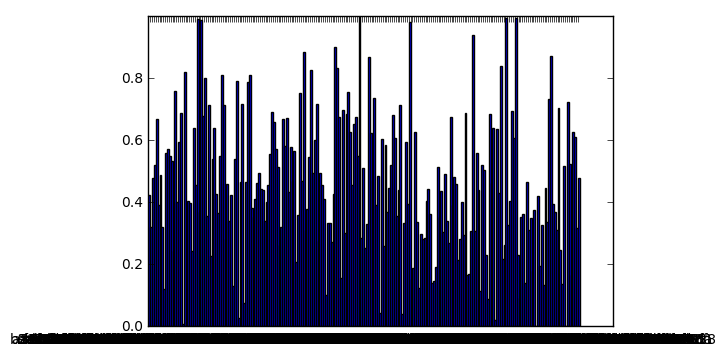

In [15]:
import pylab as pl
import numpy as np

d = img_recs
X = np.arange(len(d))
pl.bar(X, d.values(), width=1)
pl.xticks(X, d.keys())
ymax = max(d.values())
pl.ylim(0, ymax)
pl.show()


